**1. Load data ke python**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("/content/no_show_appointments.csv")
data

,NomorPasien,NomorAppointment,JenisKelamin,TanggalPembuatan,TanggalAppointment,Umur,Daerah,Beasiswa,DarahTinggi,Diabetes,Alkohol,Disabled,SMS_received,No-show
0,2.143110e+13,5611376,F,2016-04-25T07:08:41Z,2016-05-25T00:00:00Z,43,Bidara Cina,0,0,0,0,0,1,No
1,2.839350e+13,5629135,M,2016-04-27T12:50:39Z,2016-04-29T00:00:00Z,78,Harapan Mulia,0,1,1,0,0,0,No
2,3.487580e+13,5686183,M,2016-05-11T12:18:24Z,2016-05-17T00:00:00Z,58,Cililitan,0,1,0,0,0,0,No
3,8.356730e+13,5729853,F,2016-05-24T07:54:37Z,2016-05-24T00:00:00Z,22,Cempaka Baru,0,0,0,0,0,0,No
4,9.186880e+14,5690145,F,2016-05-12T09:34:57Z,2016-05-12T00:00:00Z,30,Cijantung,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,8.963580e+12,5640115,F,2016-04-29T10:08:27Z,2016-05-03T00:00:00Z,87,Cipedak,0,0,0,0,0,1,No
110523,4.122330e+11,5565723,F,2016-04-11T09:18:53Z,2016-05-13T00:00:00Z,33,Cilandak Barat,0,0,0,0,0,0,Yes
110524,4.542430e+12,5694002,F,2016-05-13T07:58:37Z,2016-05-18T00:00:00Z,29,Cipinang Besar Selatan,0,0,0,0,0,0,No
110525,3.726330e+11,5682927,F,2016-05-11T07:01:23Z,2016-05-13T00:00:00Z,50,Angke,0,0,0,0,0,0,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NomorPasien         110527 non-null  float64
 1   NomorAppointment    110527 non-null  int64  
 2   JenisKelamin        110527 non-null  object 
 3   TanggalPembuatan    110527 non-null  object 
 4   TanggalAppointment  110527 non-null  object 
 5   Umur                110527 non-null  int64  
 6   Daerah              110527 non-null  object 
 7   Beasiswa            110527 non-null  int64  
 8   DarahTinggi         110527 non-null  int64  
 9   Diabetes            110527 non-null  int64  
 10  Alkohol             110527 non-null  int64  
 11  Disabled            110527 non-null  int64  
 12  SMS_received        110527 non-null  int64  
 13  No-show             110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
data.columns = [c.strip().lower().replace('-','_') for c in data.columns]
data['jeniskelamin'].replace(['M', 'F'], [0,1], inplace = True)
data['no_show'].replace(['No', 'Yes'], [0,1], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nomorpasien         110527 non-null  float64
 1   nomorappointment    110527 non-null  int64  
 2   jeniskelamin        110527 non-null  int64  
 3   tanggalpembuatan    110527 non-null  object 
 4   tanggalappointment  110527 non-null  object 
 5   umur                110527 non-null  int64  
 6   daerah              110527 non-null  object 
 7   beasiswa            110527 non-null  int64  
 8   darahtinggi         110527 non-null  int64  
 9   diabetes            110527 non-null  int64  
 10  alkohol             110527 non-null  int64  
 11  disabled            110527 non-null  int64  
 12  sms_received        110527 non-null  int64  
 13  no_show             110527 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 11.8+ MB


In [ ]:
data.head()

,nomorpasien,nomorappointment,jeniskelamin,tanggalpembuatan,tanggalappointment,umur,daerah,beasiswa,darahtinggi,diabetes,alkohol,disabled,sms_received,no_show
0,2.143110e+13,5611376,1,2016-04-25T07:08:41Z,2016-05-25T00:00:00Z,43,Bidara Cina,0,0,0,0,0,1,0
1,2.839350e+13,5629135,0,2016-04-27T12:50:39Z,2016-04-29T00:00:00Z,78,Harapan Mulia,0,1,1,0,0,0,0
2,3.487580e+13,5686183,0,2016-05-11T12:18:24Z,2016-05-17T00:00:00Z,58,Cililitan,0,1,0,0,0,0,0
3,8.356730e+13,5729853,1,2016-05-24T07:54:37Z,2016-05-24T00:00:00Z,22,Cempaka Baru,0,0,0,0,0,0,0
4,9.186880e+14,5690145,1,2016-05-12T09:34:57Z,2016-05-12T00:00:00Z,30,Cijantung,0,0,0,0,0,0,0


In [ ]:
data.describe()

,nomorpasien,nomorappointment,jeniskelamin,umur,beasiswa,darahtinggi,diabetes,alkohol,disabled,sms_received,no_show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,0.649977,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.920000e+04,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999820e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


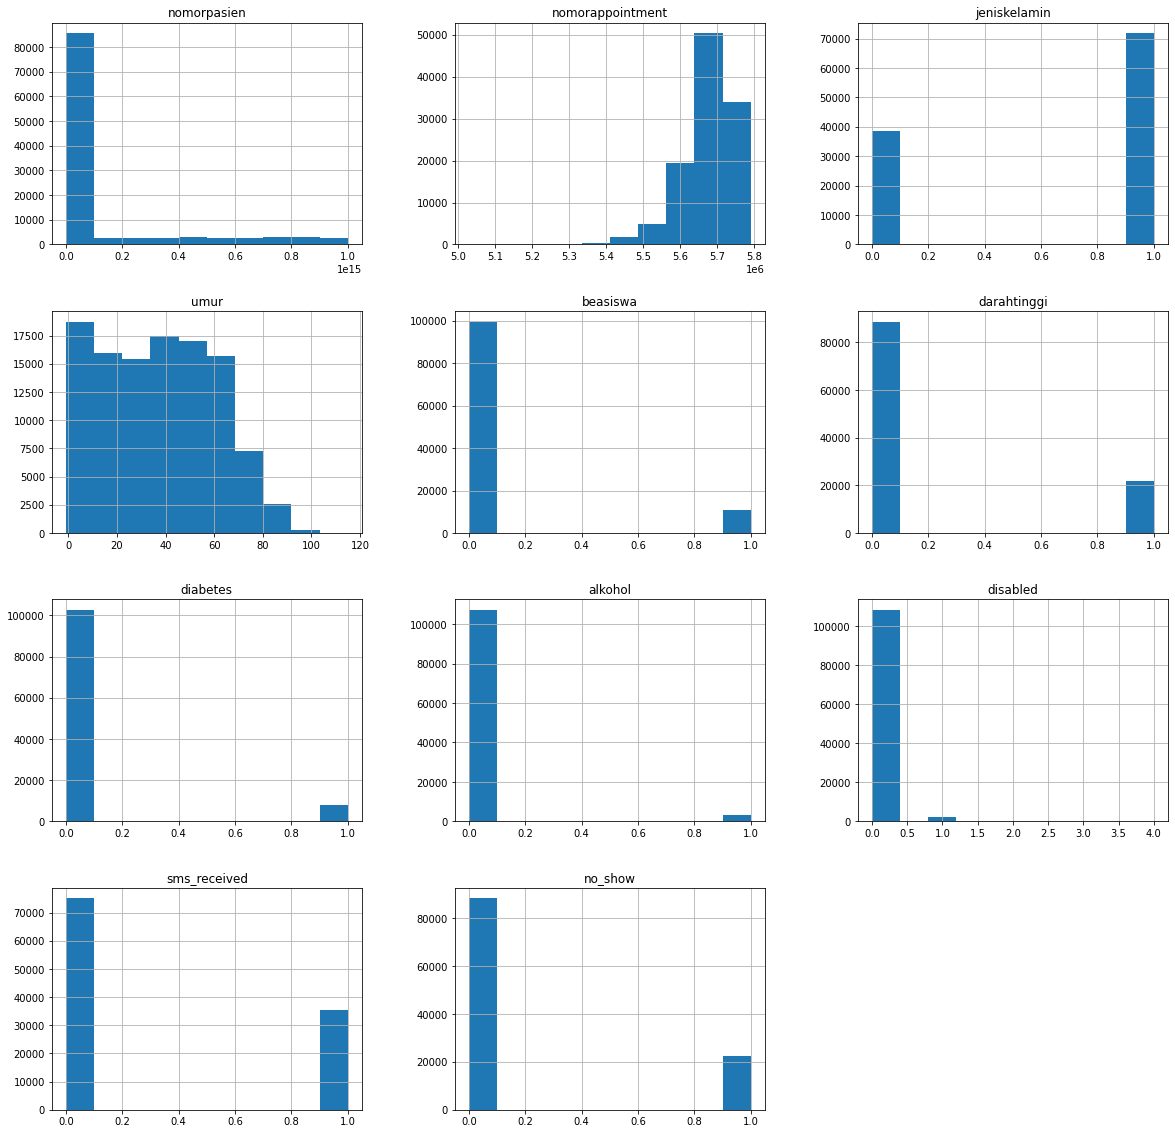

In [ ]:
data.hist(figsize=(20,20));

**2. Cek data tidak lengkap dan outlier, dan sisihkan**

In [ ]:
data.isna().sum()

nomorpasien           0
nomorappointment      0
jeniskelamin          0
tanggalpembuatan      0
tanggalappointment    0
umur                  0
daerah                0
beasiswa              0
darahtinggi           0
diabetes              0
alkohol               0
disabled              0
sms_received          0
no_show               0
dtype: int64

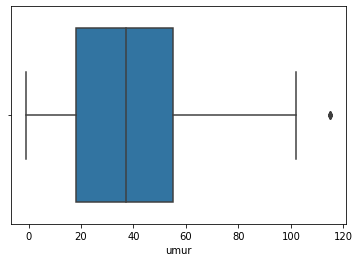

In [ ]:
sns.boxplot(x=data["umur"])

In [ ]:
data = data.drop(data[(data["umur"]<0)].index)
data = data.drop(data[(data["umur"]>100)].index)

In [ ]:
q1=data['umur'].quantile(0.25)
q3=data['umur'].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q3-1.5*iqr
data = data.drop(data[(data["umur"]<ll)].index)
data = data.drop(data[(data["umur"]>ul)].index)

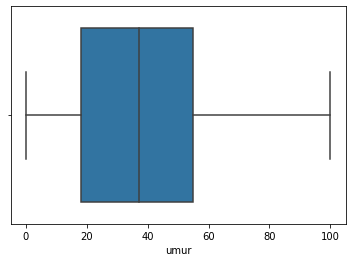

In [ ]:
sns.boxplot(x=data["umur"])

In [ ]:
data.describe()

,nomorpasien,nomorappointment,jeniskelamin,umur,beasiswa,darahtinggi,diabetes,alkohol,disabled,sms_received,no_show
count,1.105190e+05,1.105190e+05,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,0.649952,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040,0.201920
std,2.560826e+14,7.129600e+04,0.476987,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878,0.401435
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172460e+12,5.640284e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172600e+13,5.680569e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725522e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999820e+14,5.790484e+06,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


**3. Buat summary data berdasarkan daerah dan perlihatkan lima daerah dengan no-show terendah dan tertinggi**

<function matplotlib.pyplot.show>

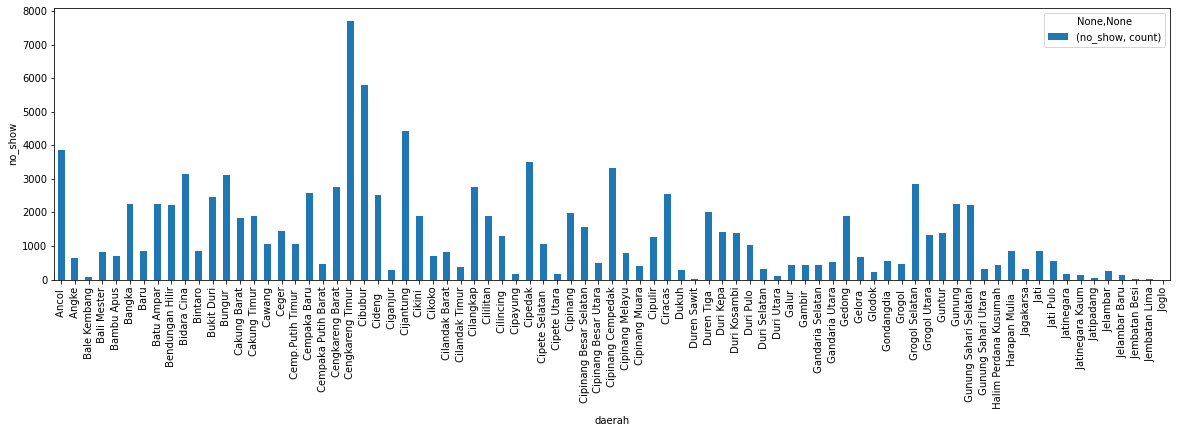

In [ ]:
data.groupby(["daerah"]).agg({"no_show":['count']}).plot(kind='bar',figsize=(20,5))
plt.ylabel("no_show")
plt.show

In [ ]:
summary = data.groupby(["daerah"])["no_show"].count()
summary.nlargest(5)

daerah
 Cengkareng Timur    7717
 Cibubur             5804
 Cijantung           4431
 Ancol               3877
 Cipedak             3514
Name: no_show, dtype: int64

<function matplotlib.pyplot.show>

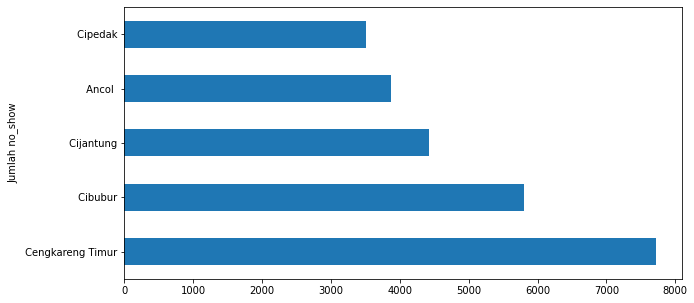

In [ ]:
data.groupby(["daerah"])["no_show"].count().nlargest(5).sort_values(ascending=False).plot(kind="barh", figsize=(10,5))
plt.ylabel("Jumlah no_show")
plt.show

In [ ]:
summary = data.groupby(["daerah"])["no_show"].count()
summary.nsmallest(5)

daerah
 Joglo             1
 Jembatan Lima     2
 Jembatan Besi     8
 Duren Sawit      10
 Jatipadang       35
Name: no_show, dtype: int64

<function matplotlib.pyplot.show>

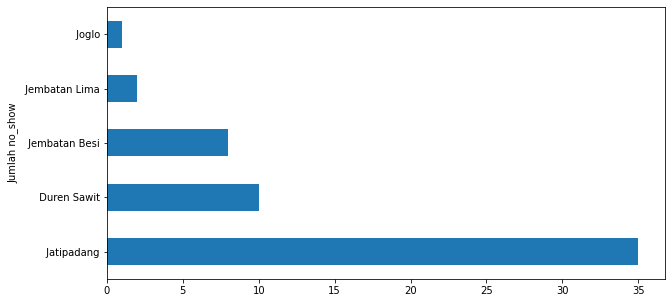

In [ ]:
data.groupby(["daerah"])["no_show"].count().nsmallest(5).sort_values(ascending=False).plot(kind="barh", figsize=(10,5))
plt.ylabel("Jumlah no_show")
plt.show

**4. Buat summary data berdasarkan selisih tanggal appointment dan janji dan perlihatkan apakah ada tren tertentu**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nomorpasien         110519 non-null  float64
 1   nomorappointment    110519 non-null  int64  
 2   jeniskelamin        110519 non-null  int64  
 3   tanggalpembuatan    110519 non-null  object 
 4   tanggalappointment  110519 non-null  object 
 5   umur                110519 non-null  int64  
 6   daerah              110519 non-null  object 
 7   beasiswa            110519 non-null  int64  
 8   darahtinggi         110519 non-null  int64  
 9   diabetes            110519 non-null  int64  
 10  alkohol             110519 non-null  int64  
 11  disabled            110519 non-null  int64  
 12  sms_received        110519 non-null  int64  
 13  no_show             110519 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 16.7+ MB


In [ ]:
data["tanggalappointment"] = pd.to_datetime(data["tanggalappointment"], format = '%Y-%m-%d',)
data["tanggalpembuatan"] = pd.to_datetime(data["tanggalpembuatan"], format = '%Y-%m-%d',)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   nomorpasien         110519 non-null  float64            
 1   nomorappointment    110519 non-null  int64              
 2   jeniskelamin        110519 non-null  int64              
 3   tanggalpembuatan    110519 non-null  datetime64[ns, UTC]
 4   tanggalappointment  110519 non-null  datetime64[ns, UTC]
 5   umur                110519 non-null  int64              
 6   daerah              110519 non-null  object             
 7   beasiswa            110519 non-null  int64              
 8   darahtinggi         110519 non-null  int64              
 9   diabetes            110519 non-null  int64              
 10  alkohol             110519 non-null  int64              
 11  disabled            110519 non-null  int64              
 12  sms_received    

In [ ]:
data["selisih_waktu"] = (data["tanggalappointment"] - data["tanggalpembuatan"]).dt.days

<function matplotlib.pyplot.show>

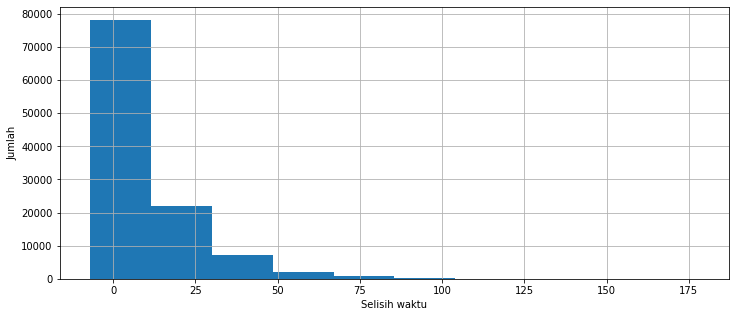

In [ ]:
data["selisih_waktu"].hist(figsize=(12,5))
plt.xlabel("Selisih waktu")
plt.ylabel("Jumlah")
plt.show

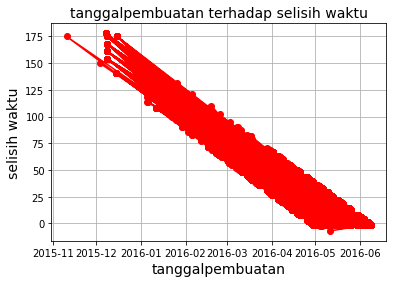

In [ ]:
plt.plot(data["tanggalpembuatan"], data["selisih_waktu"], color='red', marker='o')
plt.title("tanggalpembuatan terhadap selisih waktu", fontsize=14)
plt.xlabel('tanggalpembuatan', fontsize=14)
plt.ylabel('selisih waktu', fontsize=14)
plt.grid(True)
plt.show()

**5. Cek apakah ada korelasi kuat antara feature ke variable No-show**

In [ ]:
data.corr()

,nomorpasien,nomorappointment,jeniskelamin,umur,beasiswa,darahtinggi,diabetes,alkohol,disabled,sms_received,no_show,selisih_waktu
nomorpasien,1.000000,0.004026,-0.007920,-0.004207,-0.002867,-0.006475,0.001617,0.011020,-0.007815,-0.009768,-0.001411,-0.001449
nomorappointment,0.004026,1.000000,-0.018516,-0.019152,0.022624,0.012752,0.022636,0.032950,0.014114,-0.256627,-0.162585,-0.771830
jeniskelamin,-0.007920,-0.018516,1.000000,0.106340,0.114313,0.055731,0.032569,-0.106160,-0.022987,0.046322,0.004096,0.028416
umur,-0.004207,-0.019152,0.106340,1.000000,-0.092427,0.504788,0.292544,0.095877,0.077382,0.012712,-0.060476,0.034838
beasiswa,-0.002867,0.022624,0.114313,-0.092427,1.000000,-0.019734,-0.024900,0.035018,-0.008521,0.001184,0.029147,-0.030426
darahtinggi,-0.006475,0.012752,0.055731,0.504788,-0.019734,1.000000,0.433095,0.087971,0.080248,-0.006315,-0.035677,-0.017229
diabetes,0.001617,0.022636,0.032569,0.292544,-0.024900,0.433095,1.000000,0.018470,0.057628,-0.014559,-0.015172,-0.027192
alkohol,0.011020,0.032950,-0.106160,0.095877,0.035018,0.087971,0.018470,1.000000,0.004689,-0.026153,-0.000191,-0.038522
disabled,-0.007815,0.014114,-0.022987,0.077382,-0.008521,0.080248,0.057628,0.004689,1.000000,-0.024028,-0.006382,-0.019870
sms_received,-0.009768,-0.256627,0.046322,0.012712,0.001184,-0.006315,-0.014559,-0.026153,-0.024028,1.000000,0.126472,0.398151


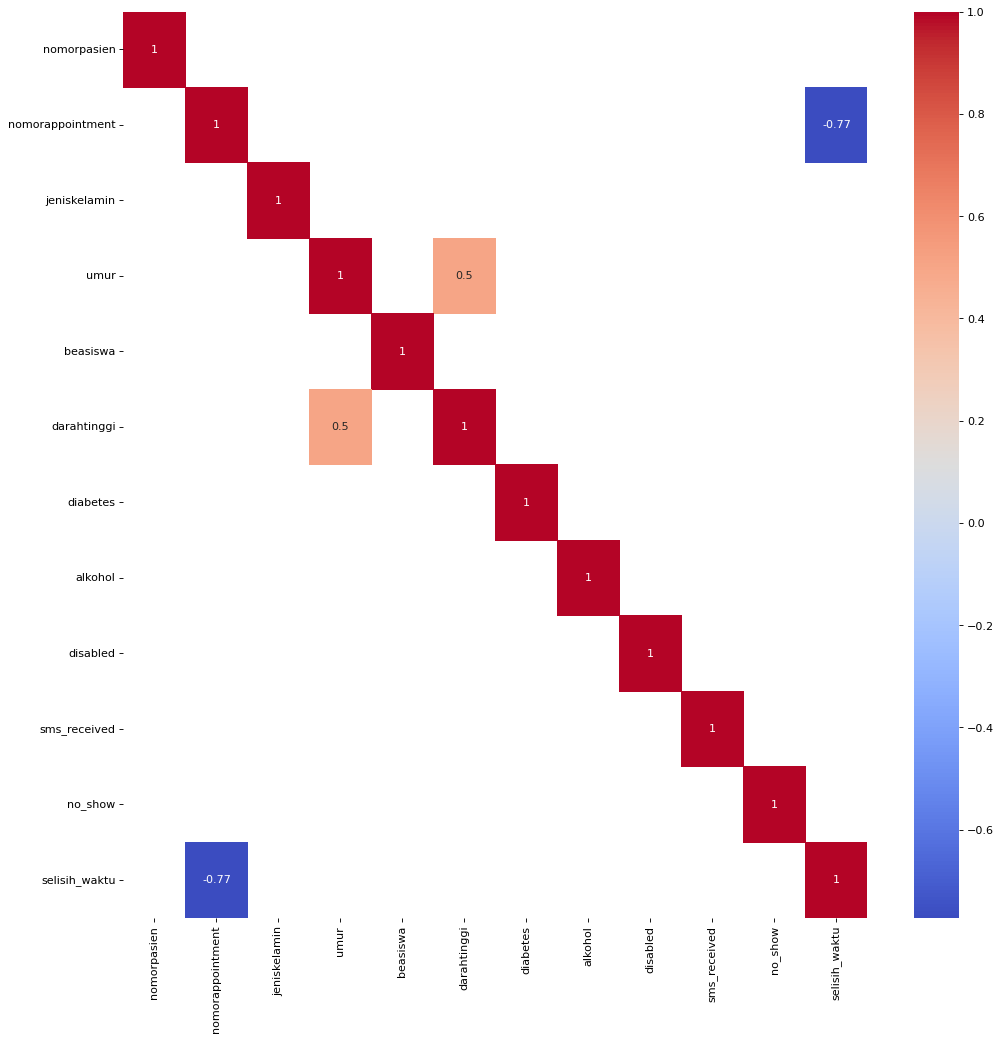

In [ ]:
cr = data.corr()
plt.figure(figsize=(15,15), dpi = 80)
sns.heatmap(cr[(cr>=0.5)|(cr<=-0.5)], annot = True, cmap = 'coolwarm')

**6. Buat regresi linear/logistik untuk memprediksi No-show**

In [ ]:
lm = sm.OLS.from_formula("no_show ~ jeniskelamin + umur + beasiswa + darahtinggi + diabetes + alkohol + disabled + sms_received + selisih_waktu", data)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                no_show   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     558.5
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:33:10   Log-Likelihood:                -53490.
No. Observations:              110519   AIC:                         1.070e+05
Df Residuals:                  110509   BIC:                         1.071e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1820      0.003     64.155      0.000       0.176       0.188
jeniskelamin      0.0017      0.003      0.654      0.513      -0.003       0.007
umur             -0.0012   6.04e-05    -19.415      0.000      -0.001      -0.001
beasiswa          0.0370      0.004      9.179      0.000       0.029       0.045
darahtinggi      -0.0047      0.004     -1.289      0.197      -0.012       0.002
diabetes          0.0189      0.005      3.707      0.000       0.009       0.029
alkohol           0.0320      0.007      4.584      0.000       0.018       0.046
disabled          0.0087      0.007      1.185      0.236      -0.006       0.023
sms_received      0.0532      0.003     19.275      0.000       0.048       0.059
selisih_waktu     0.0044   8.46e-05     51.491      0.000       0.004       0.005
==============================================================================
Omnibus:                    20877.478   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35482.792
Skew:                           1.383   Prob(JB):                         0.00
Kurtosis:                       3.222   Cond. No.                         278.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""